In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm_T = LinearRegression()
from sklearn.linear_model import Lasso
lasso  = Lasso()
from sklearn.linear_model import Ridge
ridge  = Ridge()

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

def rm_out(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list = [x for x in df[col] if (x > mean-k*sd and x < mean+k*sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of outliers removed-->',df.shape[0] - df1.shape[0])

In [2]:
body_fat = pd.read_csv(r'D:\imarticus\datasets\bodyfat.csv')

In [3]:
body_fat.head()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7


In [4]:
body_fat_x  = body_fat.iloc[:,1:]
body_fat_y  = body_fat.iloc[:,0]

In [5]:
mat = body_fat_x.corr()

In [6]:
print(mat)

              Age    Weight    Height      Neck     Chest   Abdomen     Ankle  \
Age      1.000000 -0.097905 -0.268673  0.038501  0.072908  0.141339 -0.073522   
Weight  -0.097905  1.000000  0.568433  0.838977  0.916047  0.888317  0.790388   
Height  -0.268673  0.568433  1.000000  0.370396  0.345312  0.265403  0.454985   
Neck     0.038501  0.838977  0.370396  1.000000  0.789799  0.769086  0.664068   
Chest    0.072908  0.916047  0.345312  0.789799  1.000000  0.922728  0.700092   
Abdomen  0.141339  0.888317  0.265403  0.769086  0.922728  1.000000  0.643211   
Ankle   -0.073522  0.790388  0.454985  0.664068  0.700092  0.643211  1.000000   
Biceps  -0.079398  0.786266  0.435460  0.701067  0.730124  0.652148  0.650841   
Wrist    0.216315  0.755123  0.420928  0.777259  0.695795  0.672061  0.688320   

           Biceps     Wrist  
Age     -0.079398  0.216315  
Weight   0.786266  0.755123  
Height   0.435460  0.420928  
Neck     0.701067  0.777259  
Chest    0.730124  0.695795  
Abdomen  

# linear

In [7]:
# model
lm_T.fit(body_fat_x,body_fat_y)
print('LINEAR')


# observing features
feature_beta =pd.DataFrame({ ' Features' : body_fat_x.columns , 'Slope' : lm_T.coef_})

print(feature_beta)
#with sorting
#print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = lm_T.score(body_fat_x , body_fat_y)

N = body_fat_x.shape[0]
K = body_fat_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred = lm_T.predict(body_fat_x)


# performance metrics
error = body_fat_y - pred

mse = np.mean(np.square(error))
rmse = np.sqrt(mse)
mape = np.mean(np.abs(error *100/body_fat_y))
Accuracy = 100- mape

print("MSE-->",mse)
print("RMSE-->",rmse)
print("MAPE-->",mape)
print('Accuracy-->',Accuracy)

LINEAR
   Features     Slope
0       Age  0.083779
1    Weight -0.083322
2    Height  0.035932
3      Neck  0.001123
4     Chest -0.138742
5   Abdomen  1.032741
6     Ankle  0.225943
7    Biceps  0.148276
8     Wrist -2.203399
Rsquare--> 0.7574718145674211
AdjRsquare--> 0.7332189960241632
MSE--> 15.392269321317324
RMSE--> 3.923298270756039
MAPE--> 24.344558471896892
Accuracy--> 75.65544152810311


# plot linear

Error --> -8.02025112989213e-15


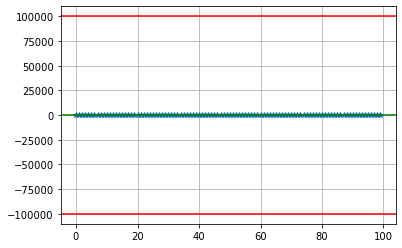

In [8]:
# 1
print('Error -->',np.mean(error))

plt.plot(error,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error.mean(),color="g")
plt.grid()

plotting the model predictions


<Figure size 1080x1080 with 0 Axes>

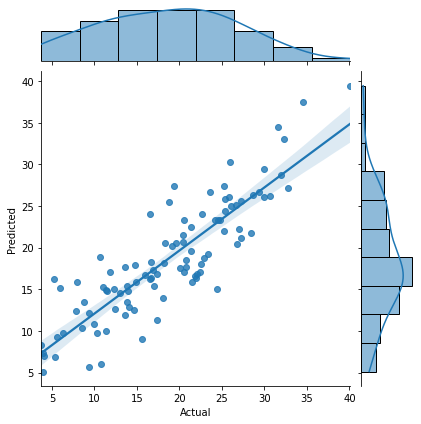

In [9]:
# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred, "Actual": body_fat_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

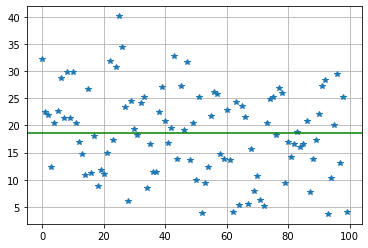

In [10]:
#3
plt.plot(body_fat.Bodyfat,'*')
plt.axhline(y= body_fat.Bodyfat.mean(),color="g")
plt.grid()

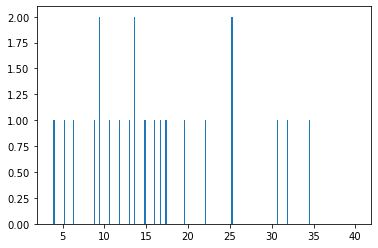

In [11]:
#4
plt.hist(body_fat.Bodyfat,bins = 1000);

# lasso

In [12]:
# model
lasso.fit(body_fat_x,body_fat_y)
print('LASSO')
# observing features
feature_beta =pd.DataFrame({ ' Features' : body_fat_x.columns , 'Slope' : lasso.coef_})

print(feature_beta)
#with sorting
#print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = lasso.score(body_fat_x , body_fat_y)

N = body_fat_x.shape[0]
K = body_fat_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred = lasso.predict(body_fat_x)


# performance metrics
error = body_fat_y - pred

mse = np.mean(np.square(error))
rmse = np.sqrt(mse)
mape = np.mean(np.abs(error *100/body_fat_y))
Accuracy = 100- mape

print("MSE-->",mse)
print("RMSE-->",rmse)
print("MAPE-->",mape)
print('Accuracy-->',Accuracy)

LASSO
   Features     Slope
0       Age  0.014595
1    Weight -0.135252
2    Height -0.000000
3      Neck -0.000000
4     Chest -0.000000
5   Abdomen  0.966888
6     Ankle -0.000000
7    Biceps  0.000000
8     Wrist -0.000000
Rsquare--> 0.7315521962084663
AdjRsquare--> 0.704707415829313
MSE--> 17.03728120220529
RMSE--> 4.127624159514198
MAPE--> 26.129722048340014
Accuracy--> 73.87027795165999


# Plot lasso

Error --> -5.4267701443677655e-15


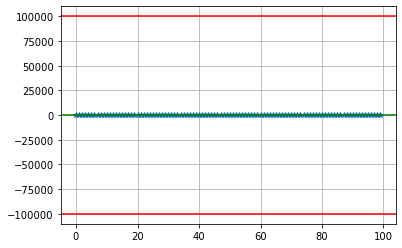

In [13]:
# 1
print('Error -->',np.mean(error))

plt.plot(error,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error.mean(),color="g")
plt.grid()

plotting the model predictions


<Figure size 1080x1080 with 0 Axes>

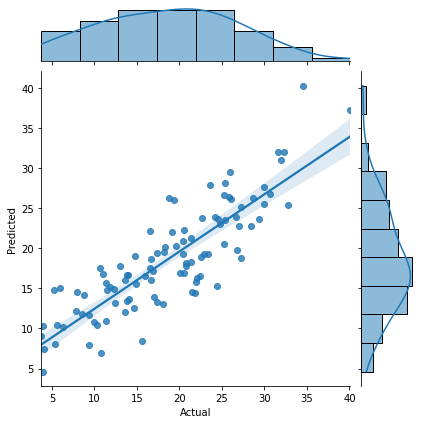

In [14]:
# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred, "Actual": body_fat_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

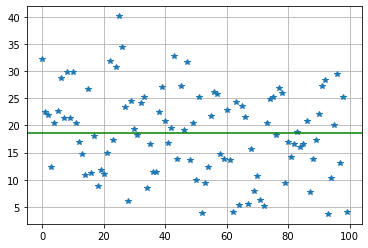

In [15]:
#3
plt.plot(body_fat.Bodyfat,'*')
plt.axhline(y= body_fat.Bodyfat.mean(),color="g")
plt.grid()

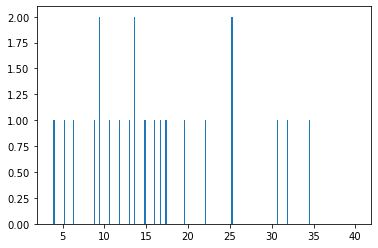

In [16]:
#4
plt.hist(body_fat.Bodyfat,bins = 1000);

#### the problem of multicolinearity can be tamed by using lasso regression

# ridge

In [17]:
# model
ridge.fit(body_fat_x,body_fat_y)
print('RIDGE')


# observing features
feature_beta =pd.DataFrame({ ' Features' : body_fat_x.columns , 'Slope' : ridge.coef_})

print(feature_beta)
#with sorting
#print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = ridge.score(body_fat_x , body_fat_y)

N = body_fat_x.shape[0]
K = body_fat_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred = ridge.predict(body_fat_x)


# performance metrics
error = body_fat_y - pred

mse = np.mean(np.square(error))
rmse = np.sqrt(mse)
mape = np.mean(np.abs(error *100/body_fat_y))
Accuracy = 100- mape

print("MSE-->",mse)
print("RMSE-->",rmse)
print("MAPE-->",mape)
print('Accuracy-->',Accuracy)

RIDGE
   Features     Slope
0       Age  0.081634
1    Weight -0.084216
2    Height  0.033125
3      Neck -0.013236
4     Chest -0.136840
5   Abdomen  1.032791
6     Ankle  0.209326
7    Biceps  0.146750
8     Wrist -2.121046
Rsquare--> 0.757443675387616
AdjRsquare--> 0.7331880429263776
MSE--> 15.394055199660782
RMSE--> 3.923525863258809
MAPE--> 24.36184425778828
Accuracy--> 75.63815574221172


# plot ridge

Error --> -2.1227464230832994e-15


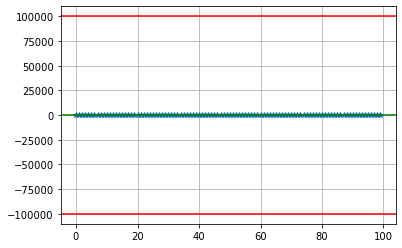

In [21]:
# 1
print('Error -->',np.mean(error))

plt.plot(error,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error.mean(),color="g")
plt.grid()

plotting the model predictions


<Figure size 1080x1080 with 0 Axes>

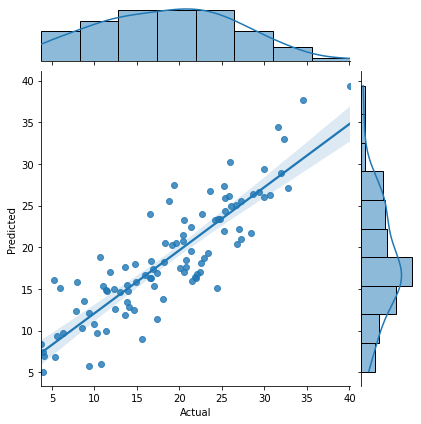

In [20]:
# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred, "Actual": body_fat_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

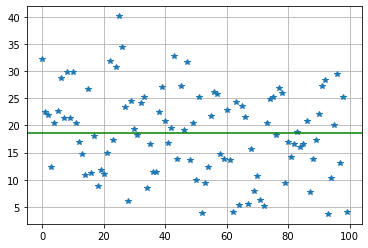

In [18]:
#3
plt.plot(body_fat.Bodyfat,'*')
plt.axhline(y= body_fat.Bodyfat.mean(),color="g")
plt.grid()

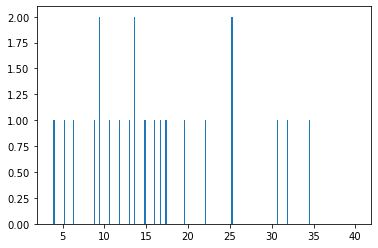

In [19]:
#4
plt.hist(body_fat.Bodyfat,bins = 1000);

